<h1><p style = "text-align:center">Restaurant Guide</p>

<h2> Introduction/Business Problem:

Delhi is all about food. One can find the best of north Indian food there. With more than 5000+ restaurants diner must find it easy to pick a restaurant which is best suited for his preferences. We will be filtering restaurants on the basis of locality, reviews and cusines which will be resulting in top pick in each category.Also, will be providing description about the restaurants along with the ratings as to make it easier for the viewer to choose accordingly.

Targeted audiance will be city residents, tourists all young and old who likes to eat out. This will help tourists as it will be a handy user guide to pick the best place to taste the flavours of India.

<h2>Data

Datasets are available on kaggel. From there will be downloading a dataset on which we will be performing are manipulations and ploting a graph of the area in the end. Foursquare API will be used to call data regarding particular area. 

For example: kaggel data will help us with the list of restuarants and foursquare api will help us with detailed description about the particular restaurant

Let's import all the libraries required

In [412]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner
import random
import requests
import certifi
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
import matplotlib.cm as cm
import matplotlib.colors as colors
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

from sklearn.cluster import KMeans
import ipywidgets as widgets
import folium
import matplotlib.pyplot as plt
%matplotlib inline

#to ignore requests InsecureRequestWarning
from requests.packages.urllib3.exceptions import InsecureRequestWarning

requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

Let's start with reading the data from csv

In [360]:
data = pd.read_csv("zomato.csv", encoding='latin1')

data

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karakí_y, ÛÁstanbul   28.977392   
9547                               Koôuyolu, ÛÁstanbul   29.041297   
9548                             Kuruí_eôme, ÛÁstanbul   29.034640   
9549                             Kuruí_eôme, ÛÁstanbul   29.036019   
9550                                    Moda, ÛÁstanbul   29.026016   

       Latitude                          Cuisines  ...          Currency  \
0     14.565443        French, Japanese, Desserts  ...  Botswana Pula(P)   
1     14.553708                          Japanese  ...  Botswana Pula(P)   
2     14.581404  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3     14.585318                   Japanese, Sushi  ...  Botswana Pula(P)   
4     14.584450                  Japanese, Korean  ...  Botswana Pula(P)   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...  Turkish Lira(TL)   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548  41.055817            Italian, World Cuisine  ...  Turkish Lira(TL)   
9549  41.057979                   Restaurant Cafe  ...  Turkish Lira(TL)   
9550  40.9

Since, the restaurant data is world based I need to filter out the restaurants situated in New Delhi only 

In [361]:
is_delhi = data['City'] == "New Delhi"
data_delhi = data[is_delhi]

data_delhi

Restaurant ID       Restaurant Name  Country Code       City  \
2560       18287358            Food Cloud             1  New Delhi   
2561       18216944             Burger.in             1  New Delhi   
2562         313333       Days of the Raj             1  New Delhi   
2563       18384127        Dilli Ka Dhaba             1  New Delhi   
2564            582             Govardhan             1  New Delhi   
...             ...                   ...           ...        ...   
8028       18445274          Motu N Patlu             1  New Delhi   
8029       18168147        S.K. Fast Food             1  New Delhi   
8030       18429375    Sufiyan Restaurant             1  New Delhi   
8031         310479       The Relax Point             1  New Delhi   
8032       18212160  Zareen's Dastarkhwan             1  New Delhi   

                                                Address     Locality  \
2560                              Aaya Nagar, New Delhi   Aaya Nagar   
2561        84, Near Honda Showroom, Adchini, New Delhi      Adchini   
2562  81/3, 1st Floor, Qutub Residency, Adchini, New...      Adchini   
2563  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...      Adchini   
2564  84, Adjacent Hero Motor Bike Showroom, Main Me...      Adchini   
...                                                 ...          ...   
8028  Batla House Chowk, Near Jamia Milia Islamia, O...  Zakir Nagar   
8029  161/32, Shop 3 Joga Bai, Main Road, Zakir Naga...  Zakir Nagar   
8030           57/12, Main Road, Zakir Nagar, New Delhi  Zakir Nagar   
8031                      92/17, Zakir Nagar, New Delhi  Zakir Nagar   
8032                Jamia Nagar, Zakir Nagar, New Delhi  Zakir Nagar   

            Locality Verbose  Longitude   Latitude  \
2560   Aaya Nagar, New Delhi   0.000000   0.000000   
2561      Adchini, New Delhi  77.196923  28.535382   
2562      Adchini, New Delhi  77.197475  28.535493   
2563      Adchini, New Delhi  77.198033  28.537547   
2564      Adchini, New Delhi  77.196924  28.535523   
...                      ...        ...        ...   
8028  Zakir Nagar, New Delhi  77.285065  28.566246   
8029  Zakir Nagar, New Delhi  77.283827  28.566189   
8030  Zakir Nagar, New Delhi  77.279779  28.567321   
8031  Zakir Nagar, New Delhi  77.278543  28.566849   
8032  Zakir Nagar, New Delhi  77.285696  28.565194   

                                 Cuisines  ...            Currency  \
2560                       Cuisine Varies  ...  Indian Rupees(Rs.)   
2561                            Fast Food  ...  Indian Rupees(Rs.)   
2562   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
2563           South Indian, North Indian  ...  Indian Rupees(Rs.)   
2564  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   
...                                   ...  ...                 ...   
8028    Lebanese, North Indian, Fast Food  ...  Indian Rupees(Rs.)   
8029                              Chinese  ...  Indian Rupees(Rs.)   
8030                              Mughlai  ...  Indian Rupees(Rs.)   
8031                         North Indian  ...  Indian Rupees(Rs.)   
8032                               Awadhi  ...  Indian Rupees(Rs.)   

     Has Table booking Has Online delivery Is delivering now  \
2560                No                  No                No   
2561                No                 Yes                No   
2562               Yes                 Yes                No   
2563                No                  No                No   
2564                No                 Yes                No   
...                ...                 ...               ...   
8028                No                  No                No   
8029                No                  No                No   
8030                No                  No                No   
8031                No                  No                No   
8032                No                  No                No   

     Switch to order menu Price range  Ag

Getting details to use forsquare API

In [362]:
CLIENT_ID = 'RPOI5VGWFA5FGYMNQEQKLIL15XDW3OMJLT0IJBID4WAQJ0Q3' 
CLIENT_SECRET = 'S13Y3UUAF0D5JCFKMIBUMAMZ1EZSMOB42WWTYXHS1CM3UYDR'
VERSION = '20200601'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RPOI5VGWFA5FGYMNQEQKLIL15XDW3OMJLT0IJBID4WAQJ0Q3
CLIENT_SECRET:S13Y3UUAF0D5JCFKMIBUMAMZ1EZSMOB42WWTYXHS1CM3UYDR


Getting the coordinates of New Delhi required to visualize the map

In [6]:
address = 'New Delhi, India'

geolocator = Nominatim()
location = geolocator.geocode(address, timeout=10)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

c:\users\pa22853\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


28.6141793 77.2022662


Let's create a map plotting all the restaurants that are in new delhi

In [11]:
map_newdelhi = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, locality, restaurantname in zip(data_delhi['Latitude'], data_delhi['Longitude'], data_delhi['Locality'],data_delhi['Restaurant Name']):
    label = '{}, {}'.format(restaurantname, locality)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newdelhi)  
    
map_newdelhi

In [44]:
print('There are {} uniques locality.'.format(len(data_delhi['Locality'].unique())))

There are 254 uniques locality.


In [118]:
data_delhi.sort_values(by='Aggregate rating', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

Restaurant ID            Restaurant Name  Country Code       City  \
3013         310143         Naturals Ice Cream             1  New Delhi   
3601           2004  Indian Accent - The Manor             1  New Delhi   
4298       18345728             Masala Library             1  New Delhi   
6656       18445790               Kopper Kadai             1  New Delhi   
3012       18418277                MOB Brewpub             1  New Delhi   
...             ...                        ...           ...        ...   
5671       18471270             Chicken Darwar             1  New Delhi   
5670         311394            Cheffron Bakery             1  New Delhi   
5669       18432206       Captain Food Factory             1  New Delhi   
5668         312620          Brown Town Bakers             1  New Delhi   
8032       18212160       Zareen's Dastarkhwan             1  New Delhi   

                                                Address         Locality  \
3013      L-8, Outer Circle, Connaught Place, New Delhi  Connaught Place   
3601           The Manor, 77, Friends Colony, New Delhi   Friends Colony   
4298                           21 A, Janpath, New Delhi          Janpath   
6656  J2/6B, 1st & 2nd Floor, B.K. Dutta Market, Raj...   Rajouri Garden   
3012     M 44, Outer Circle, Connaught Place, New Delhi  Connaught Place   
...                                                 ...              ...   
5671                    CRPF Camp, Najafgarh, New Delhi        Najafgarh   
5670  B-26, Gopal Nagar, Main Dhansa Road, Najafgarh...        Najafgarh   
5669  1620-B/2 Opposite HDFC Bank, Thana Road,Najafg...        Najafgarh   
5668  RZ-20-21, Old Roshan Pura, Parawat Road, Near ...        Najafgarh   
8032                Jamia Nagar, Zakir Nagar, New Delhi      Zakir Nagar   

                Locality Verbose  Longitude   Latitude  \
3013  Connaught Place, New Delhi  77.222148  28.634348   
3601   Friends Colony, New Delhi  77.257106  28.570142   
4298          Janpath, New Delhi  77.218645  28.618245   
6656   Rajouri Garden, New Delhi  77.119547  28.647627   
3012  Connaught Place, New Delhi  77.222642  28.633276   
...                          ...        ...        ...   
5671        Najafgarh, New Delhi  76.962271  28.636138   
5670        Najafgarh, New Delhi  76.971837  28.610370   
5669        Najafgarh, New Delhi  76.981756  28.610581   
5668        Najafgarh, New Delhi  76.984727  28.607614   
8032      Zakir Nagar, New Delhi  77.285696  28.565194   

                                 Cuisines  ...            Currency  \
3013                            Ice Cream  ...  Indian Rupees(Rs.)   
3601                        Modern Indian  ...  Indian Rupees(Rs.)   
4298                        Modern Indian  ...  Indian Rupees(Rs.)   
6656                         North Indian  ...  Indian Rupees(Rs.)   
3012  Continental, Italian, Asian, Indian  ...  Indian Rupees(Rs.)   
...                                   ...  ...                 ...   
5671                   Fast Food, Mughlai  ...  Indian Rupees(Rs.)   
5670                               Bakery  ...  Indian Rupees(Rs.)   
5669                              Chinese  ...  Indian Rupees(Rs.)   
5668                  Desserts, Fast Food  ...  Indian Rupees(Rs.)   
8032                               Awadhi  ...  Indian Rupees(Rs.)   

     Has Table booking Has Online delivery Is delivering now  \
3013                No                 Yes                No   
3601                No                  No                No   
4298                No                  No                No   
6656                No                  No                No   
3012                No                  No                No   
...                ...                 ...               ...   
5671                No                  No                No   
5670                No                  No                No   
5669                No                  No                No   
5668          

Let's create a new dataframe which is consist of list of restaurants that have highest rating in a particular locality

In [363]:
newdata = data_delhi.groupby(['Locality'])['Aggregate rating'].transform(max) == data_delhi['Aggregate rating']
    
basedonlocality = data_delhi[newdata]


In [364]:
locality_grouped = basedonlocality.groupby('Restaurant ID').mean().reset_index()

locality_grouped

Restaurant ID  Country Code  Longitude   Latitude  Average Cost for two  \
0              112             1  77.270476  28.561641                  1800   
1              189             1  77.229334  28.667644                   500   
2              349             1  77.080281  28.629900                   350   
3              412             1  77.254273  28.541957                   500   
4              422             1  77.237866  28.641043                  2000   
..             ...           ...        ...        ...                   ...   
373       18466389             1  77.081716  28.692524                   250   
374       18466972             1  77.279812  28.567442                   350   
375       18478723             1  77.137545  28.560506                   300   
376       18492061             1  77.278845  28.567200                   200   
377       18492065             1  77.279663  28.567715                   200   

     Price range  Aggregate rating  Votes  
0              3               4.2    391  
1              2               3.3    132  
2              1               3.4     86  
3              2               3.8    495  
4              4               3.9    295  
..           ...               ...    ...  
373            1               0.0      0  
374            1               0.0      0  
375            1               0.0      0  
376            1               0.0      0  
377            1               0.0      0  

[378 rows x 8 columns]

Using Elbow method to get the optimal K value for k-mean cluster

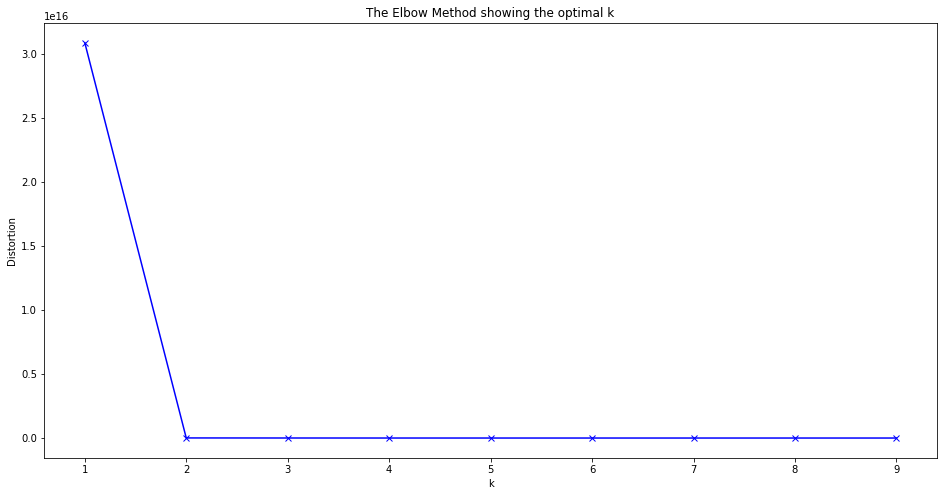

In [413]:
# elbow method code to get the optimal K

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(locality_grouped)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Using K-mean cluster

In [404]:
kclusters = 3

locality_grouped_clustering = locality_grouped.drop('Restaurant ID', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(locality_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 0, 0, 2, 0, 0, 2, 2, 0])

In [406]:
basedonlocality.insert(0, 'Cluster Labels', kmeans.labels_)

basedonlocality

Cluster Labels  Restaurant ID       Restaurant Name  Country Code  \
2560               2       18287358            Food Cloud             1   
2572               0       18425159          Nariyal Cafe             1   
2573               0         310958  Rustom's Parsi Bhonu             1   
2577               0         308235              Sultanat             1   
2578               2       18258757          Bella Italia             1   
...              ...            ...                   ...           ...   
8028               0       18445274          Motu N Patlu             1   
8029               0       18168147        S.K. Fast Food             1   
8030               0       18429375    Sufiyan Restaurant             1   
8031               0         310479       The Relax Point             1   
8032               0       18212160  Zareen's Dastarkhwan             1   

           City                                            Address  \
2560  New Delhi                              Aaya Nagar, New Delhi   
2572  New Delhi                  A-4, 3rd Foor, Adchini, New Delhi   
2573  New Delhi                         94-A/B, Adchini, New Delhi   
2577  New Delhi  31-BC, Ground Floor, Aditya Mega Mall, Karkard...   
2578  New Delhi  Ground Floor, MLCP, IGI Terminal 3, Aerocity, ...   
...         ...                                                ...   
8028  New Delhi  Batla House Chowk, Near Jamia Milia Islamia, O...   
8029  New Delhi  161/32, Shop 3 Joga Bai, Main Road, Zakir Naga...   
8030  New Delhi           57/12, Main Road, Zakir Nagar, New Delhi   
8031  New Delhi                      92/17, Zakir Nagar, New Delhi   
8032  New Delhi                Jamia Nagar, Zakir Nagar, New Delhi   

                           Locality                          Locality Verbose  \
2560                     Aaya Nagar                     Aaya Nagar, New Delhi   
2572                        Adchini                        Adchini, New Delhi   
2573                        Adchini                        Adchini, New Delhi   
2577  Aditya Mega Mall, Karkardooma  Aditya Mega Mall, Karkardooma, New Delhi   
2578                       Aerocity                       Aerocity, New Delhi   
...                             ...                                       ...   
8028                    Zakir Nagar                    Zakir Nagar, New Delhi   
8029                    Zakir Nagar                    Zakir Nagar, New Delhi   
8030                    Zakir Nagar                    Zakir Nagar, New Delhi   
8031                    Zakir Nagar                    Zakir Nagar, New Delhi   
8032                    Zakir Nagar                    Zakir Nagar, New Delhi   

      Longitude   Latitude  ...            Currency  Has Table booking  \
2560   0.000000   0.000000  ...  Indian Rupees(Rs.)                 No   
2572  77.199152  28.538438  ...  Indian Rupees(Rs.)                Yes   
2573  77.198157  28.537896  ...  Indian Rupees(Rs.)                Yes   
2577  77.301603  28.656262  ...  Indian Rupees(Rs.)                Yes   
2578  77.087897  28.554463  ...  Indian Rupees(Rs.)                 No   
...         ...        ...  ...                 ...                ...   
8028  77.285065  28.566246  ...  Indian Rupees(Rs.)                 No   
8029  77.283827  28.566189  ...  Indian Rupees(Rs.)                 No   
8030  77.279779  28.567321  ...  Indian Rupees(Rs.)                 No   
8031  77.278543  28.566849  ...  Indian Rupees(Rs.)                 No   
8032  77.285696  28.565194  ...  Indian Rupees(Rs.)                 No   

     Has Online delivery Is delivering now Switch to order menu Price range  \
2560                  No                No                   No           2   
2572                  No                No                   No           3   
2573                 Yes                No                   No           3   
2577                 Yes                No                   No           3   
2578   

Visualizing the map plotting all the restuarants that have high rating per location

In [407]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, rating, cluster in zip(basedonlocality['Latitude'], basedonlocality['Longitude'], basedonlocality['Restaurant Name'], basedonlocality['Aggregate rating'], basedonlocality['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) +"\n"+ str(rating), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h1>Above we have plotted best rated restaurants in the locality. Now we will do the same on the basis of cuisine

Repeating the same process for filtering data to find restaurant with best rating per cuisine

In [279]:
cuisine_new = data_delhi.groupby(['Cuisines'])['Aggregate rating'].transform(max) == data_delhi['Aggregate rating']
    
cuisine_data = data_delhi[cuisine_new]
cuisine_data = cuisine_data.drop('Rating', axis = 1)

In [280]:
cuisine_grouped = cuisine_data.groupby('Restaurant ID').mean().reset_index()

cuisine_grouped

Restaurant ID  Country Code  Longitude   Latitude  Average Cost for two  \
0               65             1  77.205934  28.558018                  1800   
1               66             1  77.221003  28.633679                  2000   
2              112             1  77.270476  28.561641                  1800   
3              177             1  77.216411  28.632313                   500   
4              182             1  77.219206  28.626629                   500   
..             ...           ...        ...        ...                   ...   
936       18491264             1  77.124247  28.636842                   500   
937       18492025             1  77.165108  28.494041                   400   
938       18492052             1  77.235576  28.556538                   300   
939       18492109             1   0.000000   0.000000                   400   
940       18493572             1   0.000000   0.000000                   350   

     Price range  Aggregate rating  Votes  
0              3               3.5    234  
1              4               3.5    706  
2              3               4.2    391  
3              2               3.8    388  
4              2               3.8    158  
..           ...               ...    ...  
936            2               0.0      1  
937            1               0.0      0  
938            1               0.0      0  
939            1               0.0      1  
940            1               0.0      0  

[941 rows x 8 columns]

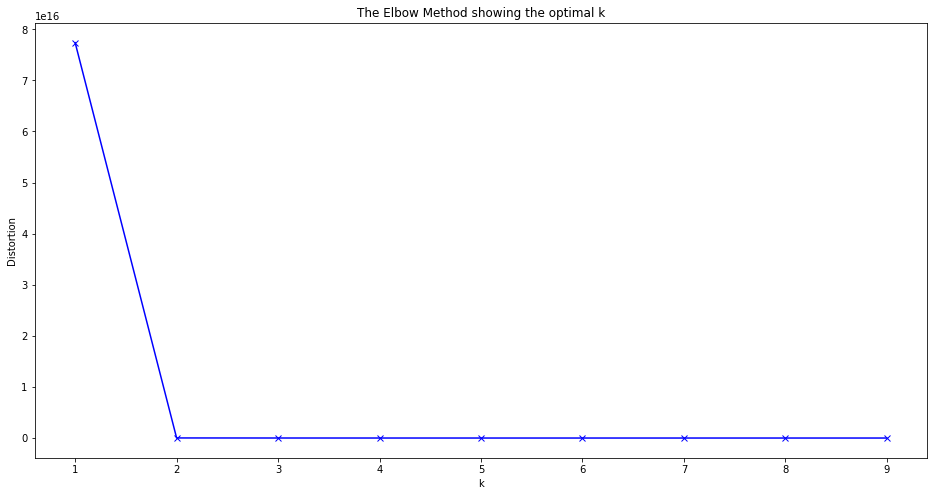

In [416]:
# elbow method code to get the optimal K

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cuisine_grouped)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [417]:
#optimal K is 7.7 to be precise

kclusters = 8

cuisine_grouped_clustering = cuisine_grouped.drop('Restaurant ID', 1)

# run k-means clustering
kmeans = KMeans(init = "k-means++",n_clusters=kclusters, random_state=0,n_init = 12).fit(cuisine_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 1, 3, 6, 0, 6, 6, 6, 1, 3])

In [418]:
cuisine_data.insert(0, 'Cluster Labels', kmeans.labels_)

cuisine_data

Cluster Labels  Restaurant ID       Restaurant Name  Country Code  \
2560               3       18287358            Food Cloud             1   
2562               1         313333       Days of the Raj             1   
2572               3       18425159          Nariyal Cafe             1   
2573               6         310958  Rustom's Parsi Bhonu             1   
2580               0       18386746          365 Naturals             1   
...              ...            ...                   ...           ...   
8003               0           2605     Rhythm Restro-Bar             1   
8013               0       18478967          Gupta Sweets             1   
8014               0       18311920            Khub Chand             1   
8028               0       18445274          Motu N Patlu             1   
8032               0       18212160  Zareen's Dastarkhwan             1   

           City                                            Address  \
2560  New Delhi                              Aaya Nagar, New Delhi   
2562  New Delhi  81/3, 1st Floor, Qutub Residency, Adchini, New...   
2572  New Delhi                  A-4, 3rd Foor, Adchini, New Delhi   
2573  New Delhi                         94-A/B, Adchini, New Delhi   
2580  New Delhi  Multilevel Car Parking, Terminal 3, Aerocity, ...   
...         ...                                                ...   
8003  New Delhi  50/8, 1st Floor, Main Market, Yusuf Sarai, New...   
8013  New Delhi        74/4, Aurbindo Marg, Yusuf Sarai, New Delhi   
8014  New Delhi         Shop 2, DDA Market, Yusuf Sarai, New Delhi   
8028  New Delhi  Batla House Chowk, Near Jamia Milia Islamia, O...   
8032  New Delhi                Jamia Nagar, Zakir Nagar, New Delhi   

         Locality        Locality Verbose  Longitude   Latitude  ...  \
2560   Aaya Nagar   Aaya Nagar, New Delhi   0.000000   0.000000  ...   
2562      Adchini      Adchini, New Delhi  77.197475  28.535493  ...   
2572      Adchini      Adchini, New Delhi  77.199152  28.538438  ...   
2573      Adchini      Adchini, New Delhi  77.198157  28.537896  ...   
2580     Aerocity     Aerocity, New Delhi  77.087897  28.554463  ...   
...           ...                     ...        ...        ...  ...   
8003  Yusuf Sarai  Yusuf Sarai, New Delhi  77.207417  28.560355  ...   
8013  Yusuf Sarai  Yusuf Sarai, New Delhi  77.207417  28.561252  ...   
8014  Yusuf Sarai  Yusuf Sarai, New Delhi  77.207237  28.558008  ...   
8028  Zakir Nagar  Zakir Nagar, New Delhi  77.285065  28.566246  ...   
8032  Zakir Nagar  Zakir Nagar, New Delhi  77.285696  28.565194  ...   

                Currency  Has Table booking Has Online delivery  \
2560  Indian Rupees(Rs.)                 No                  No   
2562  Indian Rupees(Rs.)                Yes                 Yes   
2572  Indian Rupees(Rs.)                Yes                  No   
2573  Indian Rupees(Rs.)                Yes                 Yes   
2580  Indian Rupees(Rs.)                 No                  No   
...                  ...                ...                 ...   
8003  Indian Rupees(Rs.)                Yes                  No   
8013  Indian Rupees(Rs.)                 No                  No   
8014  Indian Rupees(Rs.)                 No                  No   
8028  Indian Rupees(Rs.)                 No                  No   
8032  Indian Rupees(Rs.)                 No                  No   

     Is delivering now Switch to order menu Price range Aggregate rating  \
2560                No                   No           2              0.0   
2562                No                   No           3              3.4   
2572                No                   No           3              4.2   
2573                No                   No           3              4.2   
2580                No                   No           2              0.0   
...                ...                  ...         ...              ...   
8003                No                   No           3       

In [419]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cuisine, cluster in zip(cuisine_data['Latitude'], cuisine_data['Longitude'], cuisine_data['Restaurant Name'], cuisine_data['Cuisines'], cuisine_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) +"\n"+ str(cuisine), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

First dropdown is consist of locality and second dropdown will consist of the cuisine available in that locality

In [427]:

dropdown1 = widgets.Dropdown(options=basedonlocality.Locality.unique(),disabled=False)

#widgets.HBox([dropdown1, button, dropdown2])

Dropdown(options=('Aaya Nagar', 'Adchini', 'Aditya Mega Mall, Karkardooma', 'Aerocity', 'Aggarwal City Mall, P…

In [429]:
cuisine = cuisine_data['Locality'] == dropdown1.value

d_cuisine = cuisine_data[cuisine]

dropdown1
#rest_cusine = data_delhi[cuisine]
dropdown2 = widgets.Dropdown(options = d_cuisine.Cuisines.unique() , disabled = False)

dropdown2

Dropdown(options=('Chinese, Italian, North Indian', 'North Indian, Mughlai, Chinese, Continental', 'North Indi…

List down the best restaurant that is based on dropdown values also later list down all the restaurants available based on dropdown values 

In [359]:
restaurant = cuisine_data['Cuisines'] == dropdown2.value
restaurant_details = cuisine_data[restaurant]
rest = data_delhi['Cuisines'] == dropdown2.value
rest_restaurant = data_delhi[rest]
print("Restaurant with highest rating for this cuisine is:")
print(restaurant_details[['Restaurant ID','Restaurant Name', 'Address']])

print("Restaurants Available are:")
print(rest_restaurant[['Restaurant ID','Restaurant Name', 'Address']])

Restaurant with highest rating for this cuisine is:
      Restaurant ID     Restaurant Name  \
3013         310143  Naturals Ice Cream   

                                            Address  
3013  L-8, Outer Circle, Connaught Place, New Delhi  
Restaurants Available are:
      Restaurant ID                    Restaurant Name  \
2613       18311951                       #InstaFreeze   
2904         303642       Kuremal Mohan Lal Kulfi Wale   
2906       18082228  Kuremal Mahavir Prasad Kulfi Wale   
2982            709                     Baskin Robbins   
3013         310143                 Naturals Ice Cream   
3224            705                     Baskin Robbins   
3264         303215                           Kulfiano   
3424           5293                        Kings Kulfi   
3522         309166                     Baskin Robbins   
3572       18375391                       Gelato Vinto   
3606       18335816             Amul Ice-Cream Parlour   
3661            702           

Now use for square API to get reviews for the restaurant that satisfy dropdown conditions

In [303]:
for index, row in restaurant_details.iterrows():
    venue_id = row['Restaurant ID']
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

    result = requests.get(url).json()
    try:
        print(result['response']['venue']['Reviews'])
    except:
        print("No Reviews are available for this restaurant")

{'meta': {'code': 429,
  'errorType': 'quota_exceeded',
  'errorDetail': 'Quota exceeded',
  'requestId': '5edf6267a2e538001b7daa4f'},
 'response': {}}

As my quota for making calls to api for a day is exceeded. I apologise but I am unable to show the result output of this last cell